In [4]:
import json
import csv

In [9]:
with open('inference_vs_cpsat.json', 'r') as jsonfile:
    cpsat_infer = json.load(jsonfile)

cpsat_sol = []
with open('cpsat_solutions.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        cpsat_sol.append(row)

In [16]:
comparison_results = []
for test_bench_id, test_result in cpsat_infer.items():
    row = 0
    while int(cpsat_sol[row][0]) != test_result['benchmark_id']:
        row += 1
    bench_row_start = row
    while int(cpsat_sol[row][3]) > test_result['feasibility_abs_makespan'] and \
        int(cpsat_sol[row][0]) == test_result['benchmark_id']:
        row += 1
    if row > bench_row_start and int(cpsat_sol[row][0]) == test_result['benchmark_id']:
        cpsat_same_quality_time = 0.5 * (float(cpsat_sol[row - 1][1]) + float(cpsat_sol[row][1]))
    else:
        cpsat_same_quality_time = float(cpsat_sol[row][1])
    infer_feasible_time = test_result['inference_time'] + test_result['feasibility_timing']
    comparison_results.append({
        'benchmark_id': test_result['benchmark_id'],
        'infer_feasible_time': infer_feasible_time,
        'cpsat_same_quality_time': cpsat_same_quality_time,
        'rel_time_savings_per': infer_feasible_time / cpsat_same_quality_time * 100.0
    })
    

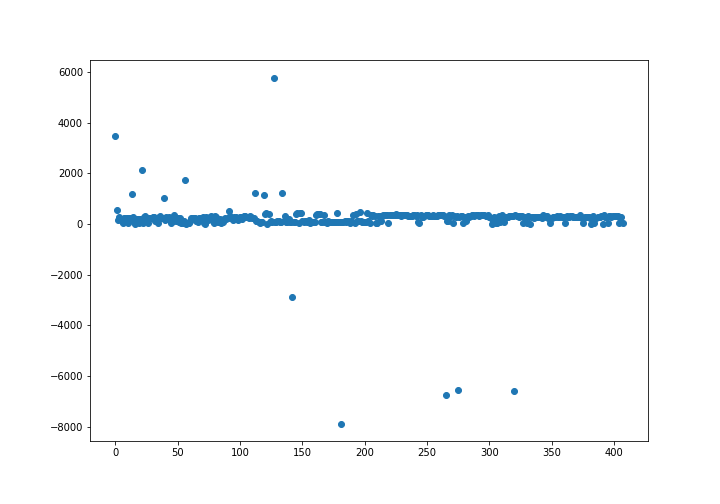

In [31]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib widget

rel_time_savings = [res['rel_time_savings_per'] for res in comparison_results]
fig, ax = plt.subplots(figsize =(10, 7))
ax.scatter(x=np.arange(len(comparison_results)), y=rel_time_savings)
plt.show()

In [24]:
len([r for r in rel_time_savings if r < 100]) / len(rel_time_savings) * 100.

22.30392156862745

In [25]:
len([r for r in rel_time_savings if r > 100]) / len(rel_time_savings) * 100.

77.69607843137256

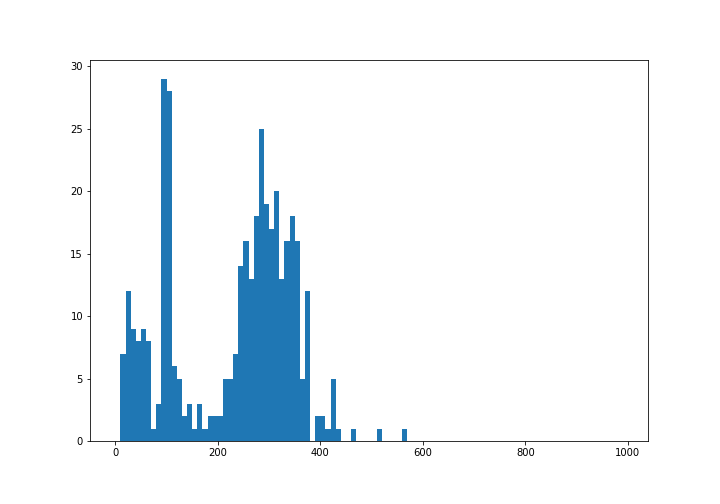

In [32]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(rel_time_savings, bins=np.arange(start=0, stop=1000, step=10))
plt.show()